## About
This study aims to identify the best method to preprocess and accurately portray mass spectrometric isotopic ratio data from individual amino acids. Experiments with valine (C<sub>5</sub>H<sub>11</sub>NO<sub>2</sub>), proline (C<sub>5</sub>H<sub>9</sub>NO<sub>2</sub>) and hydroxyproline (C<sub>5</sub>H<sub>9</sub>NO<sub>3</sub>) samples has been conducted and four isotopes ratios are of interest (H<sub>1</sub>/H<sub>2</sub>, C<sub>12</sub>/C<sub>13</sub>, N<sub>14</sub>/N<sub>15</sub> and O<sub>16</sub>/O<sub>18</sub>). The goal is find a method to represent the data in a accurate and precise way. Ideally, the ranking of the amino acids should be the same for different isotopic ratios (the accuracy problem) and the variance of the measurement should not be too broad (the precision problem). Specifically, previous attempts has shown that there the ranking of amino acids differ for N and H isotopes, and that carbon isotopic ratios has a high variance (in the order of percentages, when it is expected to be in promille). The carbon measurement problem causes an issue in reproducibility of experiments. These errors could be caused by either measurement and sample preperation errors, or data preprocessing and statistical method. This project focuses solely on the data preprocessing, data processing and statistical methods approach.



## Current steps
- Precision problem: Find method that reduces the variance of isotopic ratios (specifically interested in finding it for C).
- Accuracy problem: Find method that gives stable ranking of amino acids for the different isotopic ratios.
- Check coefficient of variance between different replicates, to check normalization.
- Check if different transformations could give better results (for example log-transformation.
- Find a method to yield meaningful reproducib<sub></sub>le experimental results, without ratios (is there a way to find similar results as above without ratios?)
- Use median of ratios, instead of ratios (Check Romans paper).
- Remocal of non-statistical outliers: Use subset of medians of data (medians of triplicates or quadruplicates), simulate similar process with gaussian distribution to find the correction factor and apply the correction factor to the romal of non-statistical outliers process. 
- 
Goal is to have a methods that produces reproducable experimental results.


## To read:
### Papers
- [A Researcher's Guide to Mass Spectrometry-based Proteomics](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5198776/)
- [Evaluation of Peak-Picking Algorithms for Protein Mass Spectrometry](https://www.researchgate.net/publication/47730346_Evaluation_of_Peak-Picking_Algorithms_for_Protein_Mass_Spectrometry)

### Website
- [High-resolution accurate mass (HRAM) for metabolomics and lipidomics](https://www.thermofisher.com/se/en/home/industrial/mass-spectrometry/mass-spectrometry-learning-center/mass-spectrometry-applications-area/metabolomics-mass-spectrometry/overview-mass-spectrometry-metabolomics/hram-mass-spectrometry-metabolomics.html)
- [Peptide fragmentation ions](http://www.matrixscience.com/help/fragmentation_help.html)

There are a lot of softwares for ms preprocessing. What do we actually want to do?

Do these software do all three steps (smoothing, baseline correction and peak picking)?



In [2]:
### imports

import os

import pandas as pd
import numpy as np


In [4]:
os.chdir("/home/ptruong/git/isoMS/")

In [21]:
file_dir = "data/Patrick/Experiment1/mzML/"

In [17]:
os.listdir(file_dir)

['20200506_DirectInjection_Lumos_Hyp_1.mzML',
 '20200506_DirectInjection_Lumos_Pro_2.mzML',
 '20200506_DirectInjection_Lumos_Valine_3.mzML',
 '20200506_DirectInjection_Lumos_Hyp_2.mzML',
 '20200506_DirectInjection_Lumos_Valine_2.mzML',
 '20200506_DirectInjection_Lumos_Hyp_3.mzML',
 '20200506_DirectInjection_Lumos_Pro_1.mzML',
 '20200506_DirectInjection_Lumos_Pro_3.mzML',
 '20200506_DirectInjection_Lumos_Valine_1.mzML']

In [18]:
from pyteomics import mzml

In [29]:
mzml_file = mzml.read(file_dir + '20200506_DirectInjection_Lumos_Hyp_1.mzML')

In [30]:
next(mzml_file)


{'index': 0,
 'id': 'controllerType=0 controllerNumber=1 scan=1',
 'defaultArrayLength': 1054264,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 50.0 m/z,
       'scan window upper limit': 200.0 m/z}]},
    'scan start time': 0.0018222472 minute,
    'filter string': 'FTMS + p NSI Full ms [50.0000-200.0000]',
    'ion injection time': 0.282198995352 millisecond}],
  'no combination': ''},
 'MS1 spectrum': '',
 'ms level': 1,
 'positive scan': '',
 'profile spectrum': '',
 'base peak m/z': 132.066116333008 m/z,
 'base peak intensity': 1695461760.0 number of detector counts,
 'total ion current': 3927511296.0,
 'lowest observed m/z': 49.502896162251 m/z,
 'highest observed m/z': 202.014287725871 m/z,
 'spectrum title': '20200506_DirectInjection_Lumos_Hyp_1.1.1. File:"20200506_DirectInjection_Lumos_Hyp_1.raw", NativeID:"controllerType=0 controllerNumber=1 scan=1"',
 'count': 2,
 'm/z array': array([ 49.50289616,  49.502

In [31]:
next(mzml_file)

{'index': 1,
 'id': 'controllerType=0 controllerNumber=1 scan=3',
 'defaultArrayLength': 527694,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 50.0 m/z,
       'scan window upper limit': 200.0 m/z}]},
    'scan start time': 0.186301419733 minute,
    'filter string': 'FTMS + p NSI Full ms2 125.0000@hcd50.00 [50.0000-200.0000]',
    'ion injection time': 0.255162477493 millisecond,
    '[Thermo Trailer Extra]Monoisotopic M/Z:': 0.0}],
  'no combination': ''},
 'precursorList': {'count': 1,
  'precursor': [{'spectrumRef': 'controllerType=0 controllerNumber=1 scan=1',
    'isolationWindow': {'isolation window target m/z': 125.0 m/z,
     'isolation window lower offset': 75.0 m/z,
     'isolation window upper offset': 75.0 m/z},
    'selectedIonList': {'count': 1,
     'selectedIon': [{'selected ion m/z': 125.0 m/z,
       'charge state': 1.0,
       'peak intensity': 2830297.25 number of detector counts}]},
    'activa

## 2020-11-25 Wednesday
### A look on the processed data


In [18]:
os.listdir("data")
pd.set_option('display.max_rows', 30)

In [19]:
file_dir = "data/MS/"
df = pd.read_csv(file_dir + "20200306_AminoAcid_Pro_1_fit.csv", sep = ",")

In [20]:
df

,seqNum,peak,I,mu,sigma,R2,isoshift,theorshift,masserror,isoratio,rt,tic,bpI,bpMZ,ion,n
0,1,0,178901.448535,116.070730,0.000269,0.996828,0.000000,0.000000,0.000000,1.000000,0.742637,1726367104,683092160,116.070732,P,NaN
1,1,13C,9755.975781,117.074117,NaN,0.996654,1.003386,1.003355,0.000032,0.054533,0.742637,1726367104,683092160,116.070732,P,5.0
2,1,15N,418.000876,117.067945,NaN,0.978855,0.997215,0.997035,0.000180,0.002336,0.742637,1726367104,683092160,116.070732,P,1.0
3,1,2H,163.643807,117.076463,NaN,0.519899,1.005733,1.006277,-0.000544,0.000915,0.742637,1726367104,683092160,116.070732,P,10.0
4,1,18O,569.345768,118.075025,NaN,0.995120,2.004295,2.004246,0.000049,0.003182,0.742637,1726367104,683092160,116.070732,P,2.0
5,1,0,257.237644,132.065977,0.000347,0.997496,0.000000,0.000000,0.000000,1.000000,0.742637,1726367104,683092160,116.070732,Hyp,NaN
6,1,13C,6.016313,133.069326,NaN,0.813113,1.003349,1.003355,-0.000006,0.023388,0.742637,1726367104,683092160,116.070732,Hyp,5.0
7,1,2H,10.525238,133.072418,NaN,0.884321,1.006440,1.006277,0.000163,0.040916,0.742637,1726367104,683092160,116.070732,Hyp,10.0
8,1,18O,2.725352,134.069755,NaN,0.752480,2.003778,2.004246,-0.000468,0.010595,0.742637,1726367104,683092160,116.070732,Hyp,3.0
9,1,0,81.359754,132.102343,0.000343,0.997799,0.000000,0.000000,0.000000,1.000000,0.742637,1726367104,683092160,116.070732,L,NaN


**seqNum**: Scan Number

**peak**: Isotope Element, 0 means it's the monoisotopic peak

**I**: Area under the curve of the gaussian fit of the peak (signal intensity)

**mu**: Mass unit (m/z)

**simga**: Sigma parameter in Gaussian function

**R2**: R squared of how good is the Gaussian fit on the peak 

**isoshift**: Observed isotopic shift

**theorshift**: Theoretical isotopic shift

**masserror**: The difference between isoshift and theorshift

**isoratio**: Division of I in isotopic peaks over I monoisotopic peak in the same scan number

**rt**: Retention time in seconds

**tic**: Total ion current

**bpI**: Base peak intensity

**bpMZ**: Base peak mz

**ion**: 1-letter code of amino acid

**n**: Number of the element in the ion (e.g. immonium ion of proline has 4 carbons) 

For MS1 the monosiotopic peak is represented by the amino acid (proline, hydroxyproline or valine), which contains the most abundant versions of 1H, 16O, 14N, 12C. Because the isotopic variant are so rare we assume that the prevalence of 2H, 18H, 15N and 13C exist only in seperate amino acids. Therefore, we have one monoisotopic intensity and four different intensities for each isotope ratio (H<sub>1</sub>/H<sub>2</sub>, C<sub>12</sub>/C<sub>13</sub>, N<sub>14</sub>/N<sub>15</sub> and O<sub>16</sub>/O<sub>18</sub>).

For MS2 we instead use the intensities of the fragment ions. The fragmentation processes is documented [here](http://www.matrixscience.com/help/fragmentation_help.html). 

## 2020-11-26 Thursday


### Testing pyteomics visualization tool
This [pyteomics example](https://pyteomics.readthedocs.io/en/latest/examples/example_msms.html) should help me with plotting and visualization. The scriptfound in this example is modified and tested below.

In [5]:
os.chdir("/home/ptruong/git/isoMS/")

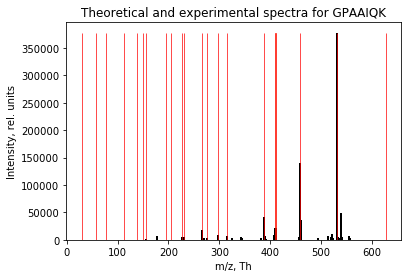

In [8]:
%run -i 'tutorial/pyteomics_plot_example.py'

### Visualizing our spectrum


In [11]:
from pyteomics import mzml
from bin.plotting import plot_spectrum


In [12]:
mzml_file = mzml.read("data/mzML/mzML_centroid_peakPicked/20200506_DirectInjection_Lumos_Hyp_1.mzML")


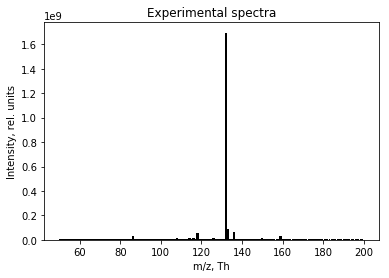

In [13]:
spectrum = next(mzml_file)
plot_spectrum(spectrum)


----- OLD STUFF BELOW -------

## 2020-11-10 Tuesday
ToDo:
- Check dinosaur, openms, skyline...
- Skim (Cramer et al.)[https://www.researchgate.net/publication/47730346_Evaluation_of_Peak-Picking_Algorithms_for_Protein_Mass_Spectrometry]
- Check how to vizualize and vizualise .mzML files to inspect.



## 2020-10-21 Webnesday
### 14:27 More tools, pyopenms and previous run of conversion to .mzML was bad
Previous run conversion run with msconvert was bad. Just reran the code without peakPicking filter.

Checked out pyopenms. It works on my desktop, but there is an error related to QT5 on my laptop when running on spyder (why?). 

I got the suggestion to use dinosaur as a peakPicker and try different peakPicking filters from it. 

ToDo:
- check if Percolator applicable at some step here?
- check how to run dinosaur. 
- peakPick with dinosaur. 
- Script code to generate some exploratory plots with .mzML files.
- Check if pandas-profiling can be useful. 

## 2020-10-18

### 23:27 Finished data conversion to .mzML
Just used msconvert to convert the .raw data to .mzML. The only filter used is pickPeaking msLevel=1-2. The end file size are much smaller than expected even though I've been told they are expected to be larger than the .raw files. Am I doing something wrong?

I will try pyopenms to open these .mzML files.

Setting up a Rmarkdown log for this project. 